In [ ]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [ ]:
df = pd.read_csv('71.csv', delimiter='\t', encoding='UTF-16LE')
df.isnull().any(axis=0)
df

,レコード数,お風呂の設定温度(℃),バイト時間(h),今まで飼ったペットの数,兄弟・姉妹の人数,学習時間(m),現在の視力,No,通学時間(m)
0,1,42,0,0,0,500,0.70,1,20
1,1,42,0,4,1,120,1.50,2,90
2,1,42,0,5,2,120,0.60,3,120
3,1,42,0,0,1,180,0.10,4,30
4,1,40,0,0,1,300,1.20,5,15
...,...,...,...,...,...,...,...,...,...
58,1,39,0,2,2,170,0.03,59,5
59,1,38,60,5,1,180,0.02,60,10
60,1,40,78,4,0,120,1.00,61,90
61,1,39,0,0,0,180,0.01,62,80


In [ ]:
y = df['現在の視力']
X = df.drop(columns=['現在の視力'])
X.shape

(63, 8)

In [ ]:
from sklearn import preprocessing
sc = preprocessing.StandardScaler() # 標準化する
X_std = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y)

In [ ]:
# 線形回帰分析
from sklearn import linear_model
rg = linear_model.Ridge()
rg.fit(X_train, y_train)

# 偏回帰係数を表示
print('coefficient(偏回帰係数) = ', rg.coef_)
# スコアを表示
print('線形回帰分析訓練スコア : ', rg.score(X_train, y_train))
print('線形回帰分析テストスコア : ', rg.score(X_test, y_test))

coefficient(偏回帰係数) =  [ 0.          0.09682424 -0.02568264  0.19708865 -0.17367694 -0.16496213
 -0.07830801 -0.13951939]
線形回帰分析訓練スコア :  0.21658708197143783
線形回帰分析テストスコア :  -0.41035215273715253


In [ ]:
# 非線形回帰分析(アンサンブル手法)でやってみる
from sklearn import ensemble
# rg = ensemble.RandomForestRegressor()　# ランダムフォレスト
rg = ensemble.GradientBoostingRegressor() # ブースティング
rg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# スコアを表示
print('「非線形回帰分析(アンサンブル手法-ブースティング)の結果」')
print('訓練スコア : ', rg.score(X_train, y_train))
print('テストスコア : ', rg.score(X_test, y_test))

「非線形回帰分析(アンサンブル手法-ブースティング)の結果」
訓練スコア :  0.9864705230232202
テストスコア :  0.1678795732934114


In [ ]:
# 現在の視力の分布
df.groupby('現在の視力').count().iloc[:,0]

現在の視力
0.01     4
0.02     2
0.03     3
0.06     1
0.08     1
0.10     3
0.20     3
0.30     6
0.40     1
0.50     4
0.60     2
0.70     4
0.80     4
0.90     1
1.00     4
1.20     3
1.50    16
2.00     1
Name: レコード数, dtype: int64

In [ ]:
# データフレームをコピー
df_new = df.copy()

# https://www.kikuchi-megane.co.jp/useful/faq/glasses01.html　←　視力を３つに分けるソース(0:常時メガネ必要、1:文字読むときにメガネ必要、2:メガネ不要)
# ３つのクラスに分けた新しいラベルデータを作る（品質が、0.3未満=0, 0.3~0.7=1, 0.7以上=2）
df_new['現在の視力'].replace({0.01:0, 0.02:0, 0.03:0, 0.06:0, 0.08:0, 0.10:0, 0.20:0, 0.30:1, 0.40:1, 0.50:1, 0.60:1, 0.70:1, 0.80:2, 0.90:2, 1.00:2, 1.20:2, 1.50:2, 2.00:2},inplace = True)
# 新しいラベルデータ
y_new = df_new.iloc[:,6]

# それぞれのクラスに属しているデータ数をカウント
df_new.groupby('現在の視力').count().iloc[:,0]

現在の視力
0.0    17
1.0    17
2.0    29
Name: レコード数, dtype: int64

In [ ]:
# 新しい訓練・テストデータを作成
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_std, y_new, stratify=y_new)
rg.fit(X_train_new, y_train_new)

# 再度正答率を求める
print('「ラベルを貼り直した後の結果」')
print("線形回帰分析正答率(学習) = ", rg.score(X_train_new, y_train_new))
print("線形回帰分析正答率(テスト) = ", rg.score(X_test_new, y_test_new))

「ラベルを貼り直した後の結果」
線形回帰分析正答率(学習) =  0.9898525264920107
線形回帰分析正答率(テスト) =  -0.3189960198577393


k近傍法の結果


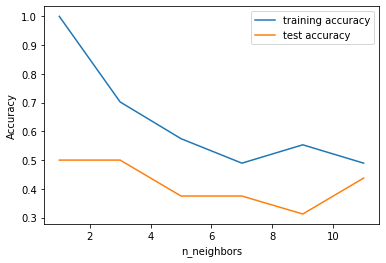

In [ ]:
# k近傍法を読み込み
from sklearn.neighbors import KNeighborsClassifier

# k近傍法を、近傍数を変えながら実行する(1,3,5....11)
neighbors_settings = range(1, 12, 2)
training_accuracy = []
test_accuracy = []
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train_new, y_train_new)
    training_accuracy.append(clf.score(X_train_new, y_train_new))
    test_accuracy.append(clf.score(X_test_new, y_test_new))

# グラフ描画
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# データの情報を表示（確認用）
print('k近傍法の結果')

結果：ラベルを張り直したほうが正答率が下がった。母数が少なすぎるため確かなことは言えないが、この母数ではラベルを貼り直すよりもそのままのほうが分布が正規分布に近くなり正答率が良くなるのではないかと思う。